<a href="https://colab.research.google.com/github/Mrityunjoy005/DSA_LAB/blob/main/Heart_Disease_Prediction_(Logistic_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score


Load the Dataset


In [2]:
# Option 1: Load from a URL
url = '/content/heart_disease_data (2).csv'
data = pd.read_csv(url)


Data Exploration and Preprocessing
Explore the Data:

In [3]:
data.head()
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Handle Missing Values (if any):

In [4]:
data = data.dropna()  # or data.fillna(data.mean())


Feature Engineering and Encoding:

In [5]:
data = pd.get_dummies(data, drop_first=True)


Feature Scaling (Logistic Regression is sensitive to feature scaling):

Use StandardScaler to standardize features.

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(data.drop('target', axis=1))
y = data['target']


Train-Test Split
Split the data into training and testing sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Training with Logistic Regression
Initialize and train the Logistic Regression model

In [8]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)


LogisticRegression(random_state=42)

Model Evaluation
Predict on the test data.

In [9]:
y_pred = lr.predict(X_test)


Evaluate the Model:
Calculate accuracy, confusion matrix, and classification report

In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8524590163934426
Confusion Matrix:
 [[25  4]
 [ 5 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



AUC Score (use predict_proba for probability scores):




In [11]:
print("AUC:", roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))


AUC: 0.9267241379310345


Coefficients Interpretation (Feature Importance)
With Logistic Regression, you can interpret feature importance based on the coefficients.

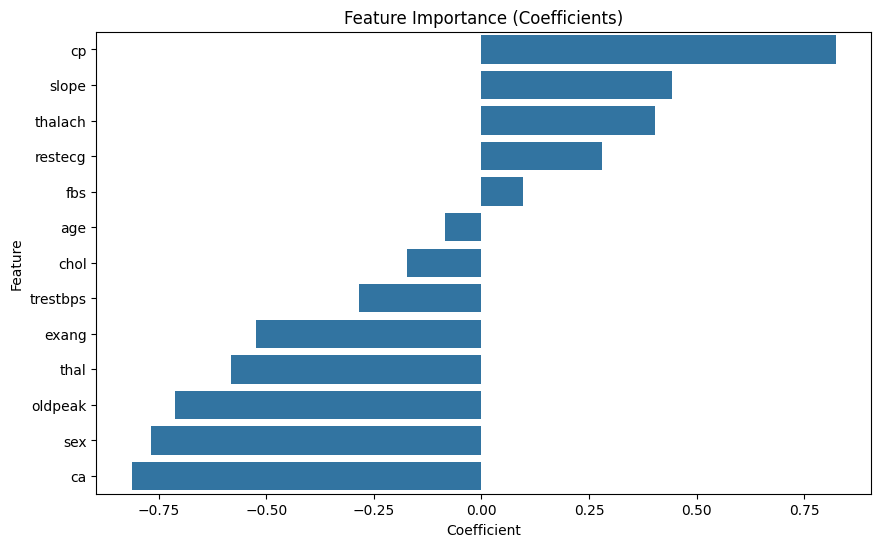

In [12]:
feature_importance = pd.DataFrame({'Feature': data.columns[:-1], 'Coefficient': lr.coef_[0]})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance (Coefficients)')
plt.show()


Hyperparameter Tuning with GridSearchCV
Tuning parameters such as C (regularization strength) and penalty can help improve the model.

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # for l1 penalty, these solvers are compatible
}
grid_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)
print("Best Parameters:", grid_lr.best_params_)


Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


Saving the Model (for Deployment)
Save the trained Logistic Regression model using joblib.

In [14]:
import joblib
joblib.dump(lr, 'heart_disease_lr_model.pkl')


['heart_disease_lr_model.pkl']

Download the model file directly in Colab if needed.

In [15]:
from google.colab import files
files.download('heart_disease_lr_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>